<a href="https://colab.research.google.com/github/AntonioNvs/projects-of-data-science/blob/main/Desafio_do_Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio do Titanic

Resolução do famoso desafio do Titanic, com detalhamento do processo e das hipóteses efetuadas.

De início, verifica-se por ser um problema de classificação, deve-se estabelecer recursos que são de importância e os que não são. Logo, com a premissa da sobrevivência estar ligada a classe socioeconômica do indivíduo, pode-se supor alguns pontos, que serão analisados para confirmar as suposições:

- Ligação com o preço da tarifa;
- Nomeclatura da pessoa (Mr., Mrs., entre outros);
- Tipo da embarcação, devido ao espaço geográfico estar ligado a economia também;
- Idade

Após analisar tais suposições e remodular os dados de acordo, será utilizado os modelos de classificação por regressão logística, árvore de decisão e Random Forest.

Depois disso, poderá ser feito alterações em alguns parâmetros e construções de novas lógicas para melhorar o desempenho.

Portanto, essa será minha resolução. Ao final do programa, irá ser apresentado minha conclusão acerca do desafio, e também, ao longo do código, a veracidade das relações propostas.


## Importação dos dados

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
data_test = pd.read_csv('https://raw.githubusercontent.com/AntonioNvs/projects-of-data-science/main/datasets/titanic/test.csv')
data_train = pd.read_csv('https://raw.githubusercontent.com/AntonioNvs/projects-of-data-science/main/datasets/titanic/train.csv')

In [25]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Análise exploratória

In [27]:
# Renomeando as colunas para português
columns_train_translate = ["IdentPassag", "Sobreviveu", "TipoIngres", "Nome", "Genero", "Idade", "IrmOuCjgABrd", "PaiOuFlhoABrd", "Bilhete", "Tarifa", "Cabine", "PntEmbar"]
columns_train_original = data_train.columns

data_train.columns = columns_train_translate

In [28]:
# Quantidade de cabines
data_train['Cabine'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
B101           1
E49            1
B73            1
A26            1
C70            1
Name: Cabine, Length: 147, dtype: int64

In [29]:
# Número de linhas e colunas do DataFrame
data_train.shape

(891, 12)

### Ligação com o preço da tarifa

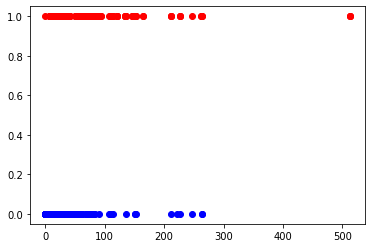

In [30]:
# Verificando a relação de sobrevivência e valor do ingresso em gráfico

x0 = data_train.query("Sobreviveu == 0")["Tarifa"]
y0 = x0 * 0

x1 = data_train.query("Sobreviveu == 1")["Tarifa"]
y1 = x1 * 0 + 1

plt.plot(x0,y0, 'bo')
plt.plot(x1, y1, 'ro')
plt.show()

In [31]:
# Média de tarifa para quem sobreviveu e não sobreviveu

print(f'Média da tarifa dos não sobreviventes: {round(x0.mean(), 2)}')
print(f'Média da tarifa dos sobreviventes: {round(x1.mean(), 2)}')

Média da tarifa dos não sobreviventes: 22.12
Média da tarifa dos sobreviventes: 48.4


É notório que a tarifa influencia na sobrevivência do indivíduo, com uma diferença das médias significativas.

### Nomeclatura da pessoa (Mr., Mrs., entre outros);

In [32]:
# Descobrindo todos os tipos de nomeclaturas, a partir do padrão '"sobrenome", "nomeclatura". "Nome"'

nomenclatures = set()

for name in data_train['Nome']:
  idx_pnt = name.find(',')
  # Obtendo a nomeclatura a partir do padrão dito
  nomenc = name[idx_pnt+1:].strip().split(' ')[0]
  nomenclatures.add(nomenc)

In [33]:
# Média de sobrevivência de cada grupo
data_name_survive = data_train.query("Sobreviveu == 1")["Nome"]
data_name_not_survive = data_train.query("Sobreviveu == 0")["Nome"]

for nomenc in nomenclatures:
  survive = 0
  not_survive = 0

  for name in data_name_survive:
    if nomenc in name:
      survive += 1
  
  for name in data_name_not_survive:
    if nomenc in name:
      not_survive += 1

  print(f'Nom: {nomenc} - Média de sobrevivência: {survive * 100 / (survive + not_survive)} - Qnt: {survive}')

Nom: Don. - Média de sobrevivência: 0.0 - Qnt: 0
Nom: Mlle. - Média de sobrevivência: 100.0 - Qnt: 2
Nom: Mr. - Média de sobrevivência: 15.667311411992262 - Qnt: 81
Nom: Major. - Média de sobrevivência: 50.0 - Qnt: 1
Nom: Sir. - Média de sobrevivência: 100.0 - Qnt: 1
Nom: Dr. - Média de sobrevivência: 42.857142857142854 - Qnt: 3
Nom: Rev. - Média de sobrevivência: 0.0 - Qnt: 0
Nom: Jonkheer. - Média de sobrevivência: 0.0 - Qnt: 0
Nom: Mrs. - Média de sobrevivência: 79.2 - Qnt: 99
Nom: Miss. - Média de sobrevivência: 69.78021978021978 - Qnt: 127
Nom: Col. - Média de sobrevivência: 50.0 - Qnt: 1
Nom: Capt. - Média de sobrevivência: 0.0 - Qnt: 0
Nom: Master. - Média de sobrevivência: 57.5 - Qnt: 23
Nom: the - Média de sobrevivência: 75.0 - Qnt: 15
Nom: Ms. - Média de sobrevivência: 100.0 - Qnt: 1
Nom: Lady. - Média de sobrevivência: 100.0 - Qnt: 1
Nom: Mme. - Média de sobrevivência: 100.0 - Qnt: 1


É perceptível que a nomeclatura influencia na sobrevivência do indivíduo, ao considerar, denominações com maior poder, como 'Miss.', que mesmo com uma alta quantidade, possui uma alta taxa de sobrevivência.

### Tipo da embarcação, devido ao espaço geográfico estar ligado a economia também;

In [34]:
# Contagem de cada tipo
data_train["PntEmbar"].value_counts()

S    644
C    168
Q     77
Name: PntEmbar, dtype: int64

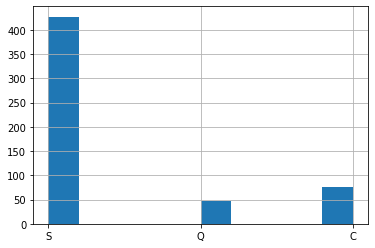

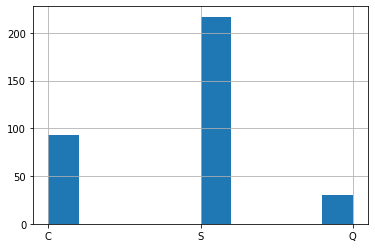

In [35]:
# Verificando a relação de sobrevivência e o ponto de embarcação em gráfico
data_train.query("Sobreviveu == 0")["PntEmbar"].hist()
plt.show()
data_train.query("Sobreviveu == 1")["PntEmbar"].hist()
plt.show()

Pelos gráficos, nota-se que o ponto de embarcação não tem influência na sobrevivência do indivíduo.

### Idade

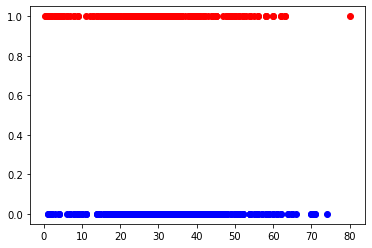

In [36]:
# Verificando a relação de sobrevivência e a idade em gráfico

x0 = data_train.query("Sobreviveu == 0")["Idade"]
y0 = x0 * 0

x1 = data_train.query("Sobreviveu == 1")["Idade"]
y1 = x1 * 0 + 1

plt.plot(x0,y0, 'bo')
plt.plot(x1, y1, 'ro')
plt.show()

In [37]:
# Média de idade para quem sobreviveu e não sobreviveu

print(f'Média da idade dos não sobreviventes: {round(x0.mean(), 2)}')
print(f'Média da idade dos sobreviventes: {round(x1.mean(), 2)}')

Média da idade dos não sobreviventes: 30.63
Média da idade dos sobreviventes: 28.34


A baixa diferença entre as médias de idade mostra que tal atributo não influencia de forma significativa na classificação.

## Modificações nos dados

In [38]:
from copy import deepcopy

# Voltando ao nome original
data_train.columns = columns_train_original

In [39]:
# Deletando colunas insignificantes para o processamento

def delete_some_columns(data):
  data = deepcopy(data)
  del data["Ticket"]
  del data["Embarked"] # Provado sua irrelevância na análise
  del data["Cabin"] # Somente a primeira classe possui uma cabine, logo, é irrelevante.
  del data["Age"] # Irrelevante
  
  return data

In [40]:
# Acréscimo de colunas classificatórias pelo nome.
# Como há muitas nomeclaturas, o código agrupará nas principais e com maior quantidade, no caso, em:
# "mr, mrs, miss, master"

def define_nomen(line):
  name = line["Name"]

  theNomen = ""

  # Qual título o nome possui
  for nomen in nomenclatures:
    if nomen in name:
      theNomen = nomen
      break
  
  # Retirando o ponto
  theNomen = theNomen.replace('.', '')

  if theNomen in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
    return 'Mr'
  elif theNomen in ['Countess', 'Mme']:
    return 'Mrs'
  elif theNomen in ['Mlle', 'Ms']:
    return 'Miss'
  elif theNomen =='Dr':
      if line['Sex']=='Male':
          return 'Mr'
      else:
          return 'Mrs'
  else:
    return theNomen

def replace_the_column_name(data):
  data = deepcopy(data)

  data["Name"] = data.apply(define_nomen, axis=1)

  data["IsMr"] = (data["Name"] == "Mr").astype(int)
  data["IsMrs"] = (data["Name"] == "Mrs").astype(int)
  data["IsMiss"] = (data["Name"] == "Miss").astype(int)
  data["IsMaster"] = (data["Name"] == "Master").astype(int)

  del data["Name"]

  return data

In [41]:
def modification_data(data):
  data = replace_the_column_name(data)
  data = delete_some_columns(data)

  # Transformando as colunas de diferentes tipos em colunas binárias
  data["Pclass"] = data["Pclass"].astype(str)
  data = data.join(pd.get_dummies(data[["Sex", "Pclass"]]))

  del data["Sex"]

  # Caso tenha valores nulos, preencha com a média
  data["Fare"].fillna(data["Fare"].mean(), inplace=True)

  # Normalizando a taxa
  fare = data["Fare"]
  data["Fare"] = (fare - fare.mean()) / fare.std()

  return data

## Machine Learning

In [42]:
data_train_oficial = modification_data(data_train)

x_train = data_train_oficial.drop(["Survived", "PassengerId"], axis=1)
y_train = data_train_oficial["Survived"]

row_x_test = modification_data(data_test)
x_test = row_x_test.drop(["PassengerId"], axis=1)

x_test.head()

,Pclass,SibSp,Parch,Fare,IsMr,IsMrs,IsMiss,IsMaster,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,3,0,0,-0.497811,1,0,0,0,0,1,0,0,1
1,3,1,0,-0.512660,0,1,0,0,1,0,0,0,1
2,2,0,0,-0.464532,1,0,0,0,0,1,0,1,0
3,3,0,0,-0.482888,1,0,0,0,0,1,0,0,1
4,3,1,1,-0.417971,0,1,0,0,1,0,0,0,1


### Treinando modelos

In [43]:
def train_and_save_model(model, x_train, y_train, x_test, path):
  model.fit(x_train, y_train)

  predict = model.predict(x_test)

  save = pd.DataFrame()
  save["PassengerId"] = row_x_test["PassengerId"].astype(int)
  save["Survived"] = predict

  save.to_csv(path, index=False)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Treinando modelo
model_logistic = LogisticRegression(max_iter=1000)
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)

train_and_save_model(model_logistic, x_train, y_train, x_test, 'logistic.csv')
train_and_save_model(model_tree, x_train, y_train, x_test, 'tree.csv')
train_and_save_model(model_forest, x_train, y_train, x_test, 'forest.csv')

## Modificação na forma dos dados

Como Random Forest teve maior precisão nas submissões, ele será utilizado na nova tentativa, que se baseará em dividir os dados familiares.

In [45]:
def modification_data_2(data):
  data = modification_data(data)

  # Retirando as formas de título e a taxa
  del data["IsMr"]
  del data["IsMrs"]
  del data["IsMiss"]
  del data["IsMaster"]
  del data["Fare"]

  types = ["Parch", "SibSp"]
  
  for _type in types:
    data[_type] = data[_type].astype(str)

  data_parents = pd.get_dummies(data[types])

  for _type in types:
    del data[_type]

  data = data.join(data_parents)

  return data

In [46]:
data_train_oficial = modification_data_2(data_train)

x_train = data_train_oficial.drop(["Survived", "PassengerId"], axis=1)
y_train = data_train_oficial["Survived"]

row_x_test = modification_data_2(data_test)
x_test = row_x_test.drop(["PassengerId"], axis=1)

del x_test["Parch_9"] # Motivos de igualdade entre os dados de teste e treino

x_test.head()

,Pclass,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,3,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
from sklearn.ensemble import RandomForestClassifier

model_forest_2 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)

train_and_save_model(model_forest_2, x_train, y_train, x_test, 'forest2.csv')

## Conclusão

O Score de cada modelo foi:

- Regressão Logística: **77,5%** 
- Árvore de Decisão: **75,3%**
- Random Forest: **78,9%**
- 2° Random Forest: **77,5%**

Concluindo, as hipóteses foram verificadas e novos caminhos surgiram. De tal forma, com mudanças nos atributos de família, não resultou em uma melhora no modelo. No entanto, o resultado foi satisfatório para o proposto, com a precisão estando entre os **10% melhores do desafio**.